In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [1]:
import pandas as pd
import numpy as np

data = np.array([
    [87, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 88, 1, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 85, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 79, 0, 3, 0, 4, 5, 0],
    [0, 0, 0, 0,88, 0, 0, 0, 0, 4],
    [0, 0, 0, 0, 0, 88, 1, 0, 0, 2],
    [0, 1, 0, 0, 0, 0, 90, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 88, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 88, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0,88, 0],
    [0, 0, 0, 0, 0, 0, 0, 0,0, 90],
])

df = pd.DataFrame(data)
print(df)


     0   1   2   3   4   5   6   7   8   9
0   87   0   0   0   1   0   0   0   0   0
1    0  88   1   0   0   0   0   0   1   1
2    0   0  85   1   0   0   0   0   0   0
3    0   0   0  79   0   3   0   4   5   0
4    0   0   0   0  88   0   0   0   0   4
5    0   0   0   0   0  88   1   0   0   2
6    0   1   0   0   0   0  90   0   0   0
7    0   0   0   0   0   1   0  88   0   0
8    0   0   0   0   0   1   0  88   0   0
9    0   0   0   0   0   0   0   0  88   0
10   0   0   0   0   0   0   0   0   0  90


In [7]:
TN = np.sum(np.diag(df.values)) - np.sum(df.values, axis=0)
FN = np.sum(np.diag(df.values)) - np.sum(df.values, axis=1)
FP = np.sum(df.values, axis=0) - np.diag(df.values)
TP = np.diag(df.values)

print("True Negative (TN):", TN)
print("False Negative (FN):", FN)
print("False Positive (FP):", FP)
print("True Positive (TP):", TP)


True Negative (TN): [606 604 607 613 604 600 602 513 599 596]
False Negative (FN): [605 602 607 602 601 602 602 604 604 605 603]
False Positive (FP): [ 0  1  1  1  1  5  1 92 94 97]
True Positive (TP): [87 88 85 79 88 88 90 88  0  0]


In [32]:
Exactitude = (TP + TN) / np.sum(df.values)
classification_error = (np.sum(FP) + np.sum(FN)) / np.sum(df.values)

print("Exactitude:", Exactitude)
print("Classification Error:", classification_error)

Exactitude: [0.70283976 0.70182556 0.70182556 0.70182556 0.70182556 0.69776876
 0.70182556 0.60953347 0.60750507 0.60446247]
Classification Error: 7.028397565922921


[ inf 0.96 0.3  0.2 ]


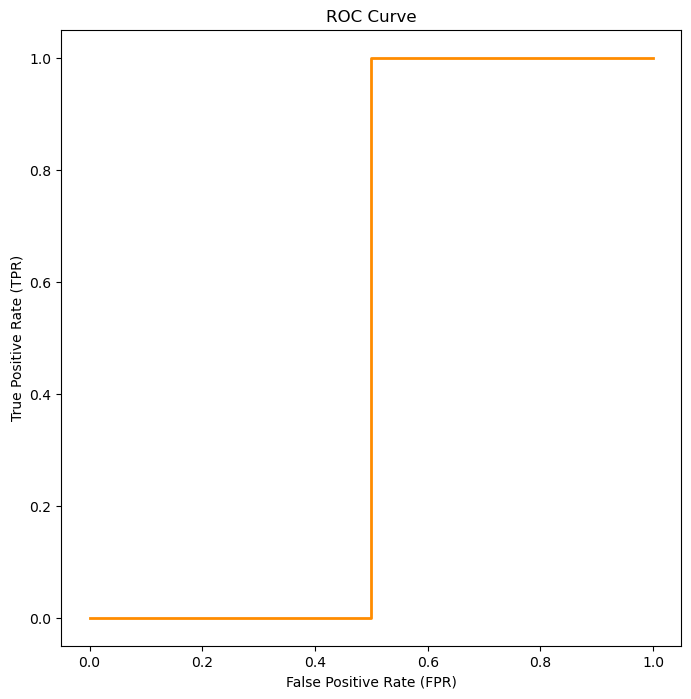

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y = [1, 0, 1, 1, 0, 1]
pred_y = [0.8, 0.96, 0.4, 0.3, 0.2, 0.7]
fpr, tpr, thresholds = roc_curve(y, pred_y)
print(thresholds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show()
